<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values # variable independiente
y = dataset.iloc[:, -1].values # variable dependiente

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
# Esta linea se hace por que las lineas estan invertidas
y = y.reshape(len(x), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
# Escalar los caracteristicas (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() # lo que hace es escalar los datos, para que la media sea 0 y la desviacion estandar sea 1
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

print(x)
print()
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


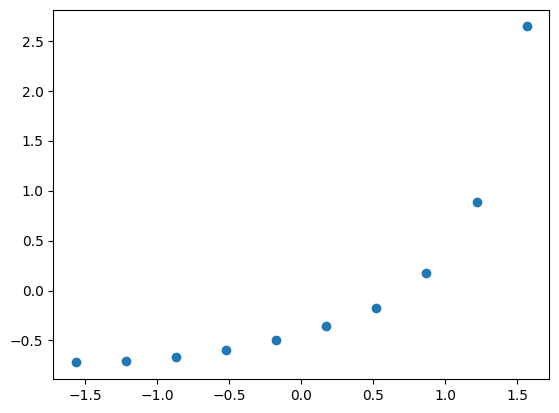

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
svr_reg.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(svr_reg.predict([[8.5]]))
sc_y.inverse_transform(svr_reg.predict(sc_x.transform([[8.5]])).reshape(-1,1))

[0.01158103]


array([[403162.81672181]])

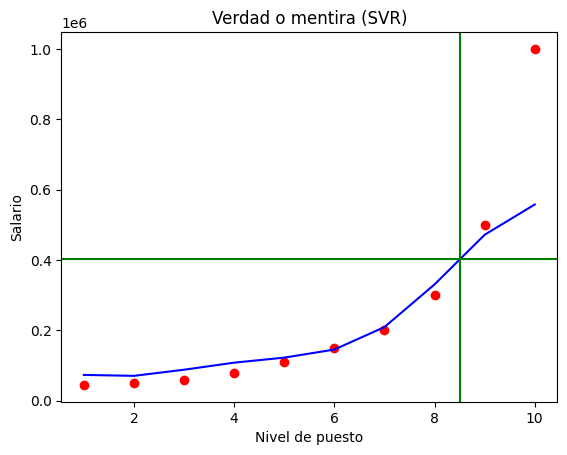

In [ ]:
#visualizar los datos
# visualizar la regrsion polinomial
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(svr_reg.predict(x).reshape(-1,1)) , color = 'blue')
plt.title('Verdad o mentira (SVR)')
plt.xlabel('Nivel de puesto')
plt.ylabel('Salario')
plt.axvline(x =8.5, color = 'g', linestyle='-' )
plt.axhline(y =403162.81672181, color='g', linestyle='-' )
plt.show()